Run the code cell below with the ▶| button above to set up this notebook, or type `SHIFT-ENTER`:

In [114]:
# !pip install --no-cache-dir -U -q folium
from datascience import *
import pandas as pd
import geojson
import geopy
import numpy as np
import matplotlib.pyplot as plt
import folium
from datascience import *
from IPython.display import HTML, display, IFrame
from folium import plugins
%matplotlib inline
from sklearn import linear_model
from scipy import stats
import os
import ipywidgets as widgets
from soc_module import *
import random
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
from IPython.display import display

from datetime import datetime

# Sociology 130 Module: "The Neighborhood Project"

Welcome to the data science part of your project! You have gathered data and entered it [here](https://goo.gl/forms/eY1mephilS6VqAT83) from your assigned census tracts.  Now it's time to explore our class data and quantify our observations using Python, a popular programming language used in data science. 

You won't need any prior programming knowledge to do this! The purpose of this module is not to teach you programming, but rather to show you the power of these tools and give you the intuition for how they work. It also allows us to quickly produce summarizations of our data!

## Table of Contents

0 - [Python and Jupyter Notebooks](#jupyter)

1 - [Class Data](#yourdata)

2 - [Our Metrics](#ourmetrics)

3 - [Census Data](#census)

4 - [Correlation](#correlation)

5 - [Regression](#regression)

# Part 0: Introduction to Python and Jupyter Notebooks: <a id='jupyter'></a>

## 1. Cells, Arithmetic, and Code
In a notebook, each rectangle containing text or code is called a *cell*.

Cells (like this one) can be edited by double-clicking on them. This cell is a text cell, written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to worry about Markdown today, but it's a pretty fun+easy tool to learn.

After you edit a cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions.) You can also press `SHIFT-ENTER` to run any cell or progress from one cell to the next.

Other cells contain code in the Python programming language.  Running a code cell will execute all of the code it contains.

Try running this cell:

In [115]:
print("Hello, World!")

Hello, World!


We will now quickly go through some very basic functionality of Python, which we'll be using throughout the rest of this notebook.

### 1.1 Arithmetic
Quantitative information arises everywhere in data science. In addition to representing commands to `print` out lines, expressions can represent numbers and methods of combining numbers. 

The expression `3.2500` evaluates to the number 3.25. (Run the cell and see.)

In [116]:
3.2500

3.25

We don't necessarily always need to say "`print`", because Jupyter always prints the last line in a code cell. If you want to print more than one line, though, do specify "`print`".

In [117]:
print(3)
4
5

3


5

Many basic arithmetic operations are built in to Python, like `*` (multiplication), `+` (addition), `-` (subtraction), and `/` (division). There are many others, which you can find information about [here](http://www.inferentialthinking.com/chapters/03/1/expressions.html). Use parenthesis to specify the order of operations, which act according to PEMDAS, just as you may have learned in school. Use parentheses for a happy new year!

In [118]:
2 + (6 * 5 - (6 * 3)) ** 2 * (( 2 ** 3 ) / 4 * 7)

2018.0

### 1.2 Variables

We sometimes want to work with the result of some computation more than once. To be able to do that without repeating code everywhere we want to use it, we can store it in a variable with *assignment statements*, which have the variable name on the left, an equals sign, and the expression to be evaluated and stored on the right. In the cell below, `(3 * 11 + 5) / 2 - 9` evaluates to 10, and gets stored in the variable `result`.

In [119]:
result = (3 * 11 + 5) / 2 - 9

In [120]:
result

10.0

## 2. Functions

    
One important form of an expression is the call expression, which first names a function and then describes its arguments. The function returns some value, based on its arguments. Some important mathematical functions are:

| Function | Description                                                   |
|----------|---------------------------------------------------------------|
| `abs`      | Returns the absolute value of its argument                    |
| `max`      | Returns the maximum of all its arguments                      |
| `min`      | Returns the minimum of all its arguments                      |
| `round`    | Round its argument to the nearest integer                     |

Here are two call expressions that both evaluate to 3

```python
abs(2 - 5)
max(round(2.8), min(pow(2, 10), -1 * pow(2, 10)))
```

These function calls first evaluate the expressions in the arguments (inside the parentheses), then evaluate the function on the results. `abs(2-5)` evaluates first to `abs(3)`, then returns `3`.

A **statement** is a whole line of code.  Some statements are just expressions, like the examples above, that can be broken down into its subexpressions which get evaluated individually before evaluating the statement as a whole.


### 2.1 Calling functions

The most common way to combine or manipulate values in Python is by calling functions. Python comes with many built-in functions that perform common operations.

For example, the `abs` function takes a single number as its argument and returns the absolute value of that number.  The absolute value of a number is its distance from 0 on the number line, so `abs(5)` is 5 and `abs(-5)` is also 5.

In [121]:
abs(5)

5

In [122]:
abs(-5)

5

Functions can be called as above, putting the argument in parentheses at the end, or by using "dot notation", and calling the function after finding the arguments, as in the cell immediately below.

In [123]:
nums = [1, 2, 5]  # a list of items, in this case, numbers

In [124]:
nums.reverse()  # reverses the item order
nums

[5, 2, 1]

# Part 1: Class Data<a id='yourdata'></a>

We can read in the data you submitted through the form by asking Google for the form information and turning it into a table.

In [125]:
image_data = Table.read_table("data/image_data.csv")
class_data = Table.read_table("data/class_data.csv")
image_data.show(5)
class_data.show(5)

Image #1,Image #1 Address,Other thoughts or comments for Image #1,Image #2,Image #2 Address,Other thoughts or comments for Image #2,Image #3,Image #3 Address,Other thoughts or comments for Image #3,Image #4,Other thoughts or comments for Image #4,Image #4 Address,Image #5,Image #5 Address,Other thoughts or comments for Image #5,Image #1 coordinates,Image #2 coordinates,Image #3 coordinates,Image #4 coordinates,Image #5 coordinates,Census Tract
https://drive.google.com/open?id=1t7Cm2UkrM467FxsdfYNLc9 ...,"2150 Channing Way, Berkeley, CA, 94704",I found this graffiti on a wall in the parking lot of a ...,https://drive.google.com/open?id=1-Kz4-Fbk5G7w39A1Vwu6nM ...,"Channing Way and Shattuck Ave, Berkeley, CA, 94704",There is a Ford Bike Station and it is almost full.,https://drive.google.com/open?id=1zjA9f2t64BX0MA9Taz4foC ...,"2344 Fulton St, Berkeley, CA, 94704",This is a house for Cal's track and field team.,https://drive.google.com/open?id=1ZGfWt-nuNBqy_m9wLT_Qvn ...,"Someone put a sticker saying ""eating animals"" on the sto ...","Channing Way and Fulton St, Berkeley, CA, 94704",https://drive.google.com/open?id=1f2JyD7z6fSZCO6vqtIlaWv ...,"2121 Channing Way, Berkeley, CA, 94704",There is a Buddhist Temple which shows the diversity of ...,"[37.8658887573699, -122.266275305354]","(37.8678899, -122.269247)","[37.8666288180719, -122.265876910725]","(37.8678899, -122.269247)","[37.866019739311, -122.266542125136]",4229
https://drive.google.com/open?id=1K2U0ccdwjWB5MMC9bbNyA0 ...,5634 Shattuck Ave.,This art shop looked out of place next to the neighborho ...,https://drive.google.com/open?id=1ON0rVTsybNXEBRBYR5JPrY ...,5699 Shattuck Ave.,This was the only apparent property that was for sale on ...,https://drive.google.com/open?id=13vvO_O3GiEu0rzlrpIhbiM ...,608 Shattuck Ave.,The side of the block near Shattuck was more dilapidated ...,nan,nan,nan,nan,nan,nan,"[37.8724895, -122.2684359]","[37.8724895, -122.2684359]","[35.130098959596, -119.460902121212]",nan,nan,4006
https://drive.google.com/open?id=1bC5tf0RrhU8ucWutTbwSA8 ...,"2067 University Ave, Berkeley, CA, 94704.",It seems that the wall was not designed for locals to po ...,https://drive.google.com/open?id=1lq2-AA8zbS9USxwmhTY_sd ...,"2067-2071 University Ave, Berkeley, CA, 94704.",There were groups of homeless people outside the restaur ...,https://drive.google.com/open?id=1XZ7O9Iv-vJlp0KGiAO9DNA ...,"2011 Berkeley Way, Berkeley, CA, 94704.","There are No-parking signs on the fence, but several car ...",https://drive.google.com/open?id=1xAhyRXCveyHCQLoWGKEjyE ...,There is a large graffiti on the wall of the parking lot ...,"2016 Berkeley Way, Berkeley, CA, 94704.",https://drive.google.com/open?id=1IRztM7ZX4HzLNUhHrLboa2 ...,"2005 Berkeley Way, Berkeley, CA, 94704.",The fence and iron gate shows that crimes may happen som ...,"[37.8720195886659, -122.269816641442]","[37.8720195886659, -122.269816641442]","[37.8728409227947, -122.270248811613]","[37.8726479989409, -122.2704598844]","[37.8728723, -122.2704417]",4224
https://drive.google.com/open?id=1DAEeW4g8askpmgbaR8JXlk ...,"535 8th St, Oakland, CA, 94607",There were a few of these green dumpsters throughout the ...,https://drive.google.com/open?id=1HNYxCgjW-eQQqQFPjCzhG1 ...,"517 8th St, Oakland, CA, 94607","There were some ""pay and display"" parking ticket machine ...",https://drive.google.com/open?id=1kyhPjq_yANAlj951QKecJ- ...,"530 8th St, Oakland, CA, 94607",This was one of four buildings that seemed abandoned/emp ...,https://drive.google.com/open?id=147w7g4FMLP4X8cjC-QxD-x ...,I took a picture of this truck because it seemed like so ...,"810 Clay St, Oakland, CA 94607",https://drive.google.com/open?id=177FjcfjP9mOJx7GkLWvsjw ...,"512 8th St, Oakland, CA 94607",I was really surprised to find a temple on this block be ...,"[37.7964115, -122.2643766]","[37.7964115, -122.2643766]","[37.8009167156494, -122.275402395618]","[37.801272625156, -122.276025874901]","[37.8008494265101, -122.275235462283]",4031
https://drive.google

Timestamp,Census Tract,Amount of Beer/Liquor Bottles (1 to 5 scale),Amount of Cigarette/Cigar Butts (1 to 5 scale),Amount of Condoms (1 to 5 scale),Amount of Garbage (1 to 5 scale),Abandoned Cars (Y?N),Treatment (1 (Friendly) to 5 (Suspicion) scale),Condition of Buildings (1 (Good) to 4 (Poor) scale),Graffiti (Y/N),Fenching (1 (None) to 4 (High mesh) scale),Renovations (Y/N),Types of Establishments,Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale),Public Transporation Available (Y/N),Private Security Visible (Y/N),Police Visible (Y/N)
10/21/2018 22:10:14,4229,2,2,1,2,0,4,2,1,2,1,"Eating places/restaurants, Professional offices (doctor ...",2,1,0,0
10/21/2018 22:23:08,4006,1,1,1,2,0,4,2,1,2,0,Liquor stores or Marijuana Dispensaries,2,1,0,1
10/22/2018 0:01:58,4224,3,2,1,3,1,3,2,0,3,1,"Bars and alcoholic beverage services, Eating places/rest ...",2,1,0,0
10/22/2018 0:08:49,4031,1,3,1,3,0,2,2,1,1,0,"Bodega deli corner-store convenience store, Eating place ...",1,0,0,0
10/22/2018 0:09:49,4239.01,1,1,1,3,0,2,2,0,1,1,"Bars and alcoholic beverage services, Professional offic ...",2,1,1,0


That's a lot of columns! Now that our data is inside the `class_data` variable, we can ask that varible for some information. We can get a list of the column names with the `.labels` attribute of the table:

In [126]:
class_data.labels

('Timestamp',
 'Census Tract',
 'Amount of Beer/Liquor Bottles (1 to 5 scale)',
 'Amount of Cigarette/Cigar Butts (1 to 5 scale)',
 'Amount of Condoms (1 to 5 scale)',
 'Amount of Garbage (1 to 5 scale)',
 'Abandoned Cars (Y?N)',
 'Treatment (1 (Friendly) to 5 (Suspicion) scale)',
 'Condition of Buildings (1 (Good) to 4 (Poor) scale)',
 'Graffiti (Y/N)',
 'Fenching (1 (None) to 4 (High mesh) scale)',
 'Renovations (Y/N)',
 'Types of Establishments',
 'Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale)',
 'Public Transporation Available (Y/N)',
 'Private Security Visible (Y/N)',
 'Police Visible (Y/N)')

Let's get some summary statistics and do some plotting.

How many of you reported on which census tracts?

In [127]:
class_data.group("Census Tract").show()

Census Tract,count
401,6
403,5
4005,5
4006,6
4007,7
4014,7
4027,6
4028,5
4031,6
4033,6



We can use the `.plot.barh()` method to this to visualize the counts:

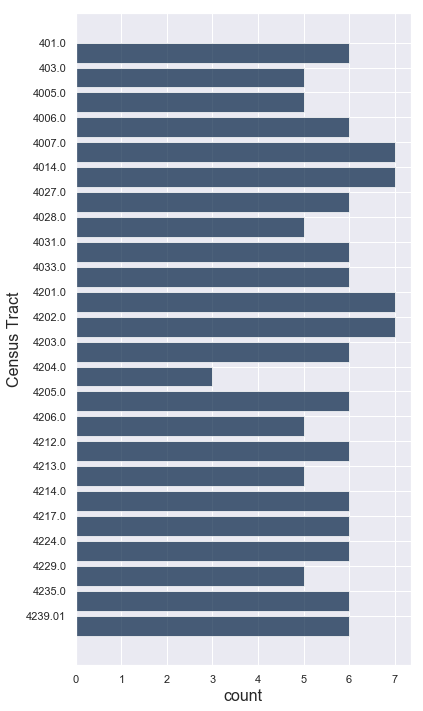

In [128]:
class_data.group("Census Tract").barh("Census Tract")

We can write a short function, `bar_chart_column`, to plot the counts for any of our columns in the table. All we have to do is select the column label in the dropdown.

In [129]:
def bar_chart_column(col):
    bar_chart_data.group(col).barh(col)

bar_chart_data = class_data.drop("What kinds of establishments are there on the block face? Select all that apply.")

dropdown = widgets.Dropdown(options=bar_chart_data.labels[1:], description="Column")
display(widgets.interactive(bar_chart_column, col=dropdown))

interactive(children=(Dropdown(description='Column', options=('Census Tract', 'Amount of Beer/Liquor Bottles (…

We can then ask for these columns and plot their means too.

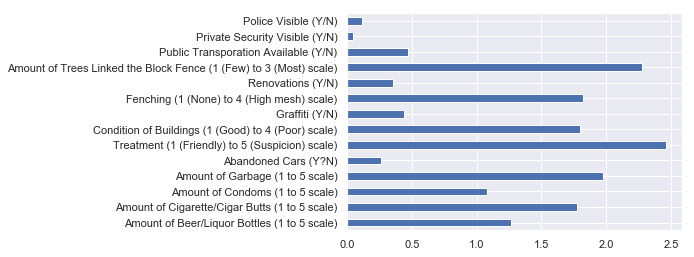

In [130]:
class_data.to_df().iloc[:,2:].mean().plot.barh();

One of the questions had checkbox answers that listed all of the establishments that were observed by each student in their assigned census tract. Let's create a seperate column for each of the possible options. A value of `1` in the column indicates that the estalishment was observed. A value of `0` indicates that the establishment was not observed.

In [133]:
establishments = pd.Series([item for sublist in [response.split(', ') for response in class_data.to_df().iloc[:, 12] if not pd.isnull(response)] for item in sublist])
ests_table = Table.empty().with_column("Types of Establishments", class_data["Types of Establishments"])

for establishment in establishments.unique():
    establishment_data = []

    for row in class_data.rows:
        ests = row.item('Types of Establishments')
       
        if not pd.isnull(ests):
            row_establishments = ests.split(', ')
        
        if establishment in row_establishments:
            establishment_data.append(1)
        else: 
            establishment_data.append(0)
    
    ests_table[establishment] = establishment_data
    
ests_table.show(5)

Types of Establishments,Eating places/restaurants,Professional offices (doctor dentist lawyer accountant real estate),Liquor stores or Marijuana Dispensaries,Bars and alcoholic beverage services,Fast food or take-out places,Warehouses,Bodega deli corner-store convenience store,Payday lenders check cashers or pawn shops,Supermarkets/grocery stores,Manufacturing,Community center,Playgrounds,Gas station,nan,Banks or credit unions,Public library,Post office,Schools or daycare centers,Parks,Chain retail stores,Auto repair/auto body shop,Fire station,N/A
"Eating places/restaurants, Professional offices (doctor ...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Liquor stores or Marijuana Dispensaries,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Bars and alcoholic beverage services, Eating places/rest ...",1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Bodega deli corner-store convenience store, Eating place ...",1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Bars and alcoholic beverage services, Professional offic ...",0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


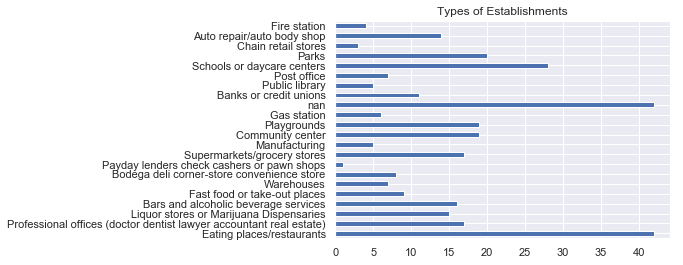

In [135]:
col_sums = []
for col in ests_table.drop(0).labels:
    col_sums.append(sum(ests_table[col]))

establishment_counts = pd.Series(col_sums, index = ests_table.drop(0).labels)
establishment_counts = establishment_counts.drop("N/A")

establishment_counts.plot.barh()
plt.title(ests_table.labels[0])
plt.show()

---

## Mapping

We can also visualize how your responses mapped out over the census tracts. We'll use a library called `folium` to map your observations onto a map of the census tracts, and include popups with your comments and photos.

In [38]:
alameda = geojson.load(open("data/alameda-2010.geojson"))
myMap = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)

map_data(myMap, alameda, image_data).save("map1.html")
IFrame('map1.html', width=700, height=400)

TypeError: __init__() missing 1 required positional argument: 'locations'

Click around census tracts near yours to see if the other students' observations are similar and see if you can eyeball any trends. Check out other areas on the map and see if there are trends for tracts in specific areas. Do specific characteristics cluster in different areas? Which ones? Which characteristsics seem to cluster together? What types of data do you think will correlate with socioeconomic characteristics like median income, poverty rate, education?  Why?

---

# Part 2: Our Metrics<a id='ourmetrics'></a>

Now that you have made some predictions, we can compare our data with socioeconomic data from the U.S. Census for the different tracts we visited and see if we can find evidence to support them. From your data, we can create some point scales that measure different aspects of a neighborhood.

For example, we can make a scale called “social disorder” for the first part of your responses. Let's first subeset our data:

In [260]:
social_disorder = class_data.select(range(1, 12))
social_disorder.show(5)

Census Tract,Amount of Beer/Liquor Bottles (1 to 5 scale),Amount of Cigarette/Cigar Butts (1 to 5 scale),Amount of Condoms (1 to 5 scale),Amount of Garbage (1 to 5 scale),Abandoned Cars (Y?N),Treatment (1 (Friendly) to 5 (Suspicion) scale),Condition of Buildings (1 (Good) to 4 (Poor) scale),Graffiti (Y/N),Fenching (1 (None) to 4 (High mesh) scale),Renovations (Y/N)
4229,2,2,1,2,0,4,2,1,2,1
4006,1,1,1,2,0,4,2,1,2,0
4224,3,2,1,3,1,3,2,0,3,1
4031,1,3,1,3,0,2,2,1,1,0
4239.01,1,1,1,3,0,2,2,0,1,1


Now we'll need to scale the values because all responses were not on the same scale. But for this part, the higher the value the more negative the social disorder was:

In [ ]:
social_disorder = scale_values(social_disorder, np.arange(1, 11))
social_disorder.show(5)

Now that our values are scaled, we can take the mean across all observation for a given census tract for a given column, and then take the mean across columns:

In [261]:
class_data.show(5)

Timestamp,Census Tract,Amount of Beer/Liquor Bottles (1 to 5 scale),Amount of Cigarette/Cigar Butts (1 to 5 scale),Amount of Condoms (1 to 5 scale),Amount of Garbage (1 to 5 scale),Abandoned Cars (Y?N),Treatment (1 (Friendly) to 5 (Suspicion) scale),Condition of Buildings (1 (Good) to 4 (Poor) scale),Graffiti (Y/N),Fenching (1 (None) to 4 (High mesh) scale),Renovations (Y/N),Types of Establishments,Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale),Public Transporation Available (Y/N),Private Security Visible (Y/N),Police Visible (Y/N)
10/21/2018 22:10:14,4229,2,2,1,2,0,4,2,1,2,1,"Eating places/restaurants, Professional offices (doctor ...",2,1,0,0
10/21/2018 22:23:08,4006,1,1,1,2,0,4,2,1,2,0,Liquor stores or Marijuana Dispensaries,2,1,0,1
10/22/2018 0:01:58,4224,3,2,1,3,1,3,2,0,3,1,"Bars and alcoholic beverage services, Eating places/rest ...",2,1,0,0
10/22/2018 0:08:49,4031,1,3,1,3,0,2,2,1,1,0,"Bodega deli corner-store convenience store, Eating place ...",1,0,0,0
10/22/2018 0:09:49,4239.01,1,1,1,3,0,2,2,0,1,1,"Bars and alcoholic beverage services, Professional offic ...",2,1,1,0


In [270]:
means = social_disorder.group("Census Tract", np.mean).values.mean(axis=1)
social_disorder = Table().with_columns(
    "Census Tract", np.unique(social_disorder.column("Census Tract")),
    "Social Disorder", means
)
social_disorder

Census Tract,Social Disorder
401,37.8636
403,37.9455
4005,365.491
4006,365.379
4007,365.701
4014,366.636
4027,367.742
4028,367.345
4031,367.742
4033,368.045


Remember, the higher the value the more negative we perceived the census tract to be.

We can do the same for our amenities part:

In [271]:
amenities = ests_table.with_columns(
    "Census Tract", class_data.column("Census Tract"),
    "Trees", class_data.column("Amount of Trees Linked the Block Fence (1 (Few) to 3 (Most) scale)")
)
amenities["Trees"] = [(0, 1)[value > 1] for value in amenities["Trees"]]
amenities.show(5)

Types of Establishments,Eating places/restaurants,Professional offices (doctor dentist lawyer accountant real estate),Liquor stores or Marijuana Dispensaries,Bars and alcoholic beverage services,Fast food or take-out places,Warehouses,Bodega deli corner-store convenience store,Payday lenders check cashers or pawn shops,Supermarkets/grocery stores,Manufacturing,Community center,Playgrounds,Gas station,nan,Banks or credit unions,Public library,Post office,Schools or daycare centers,Parks,Chain retail stores,Auto repair/auto body shop,Fire station,N/A,Census Tract,Trees
"Eating places/restaurants, Professional offices (doctor ...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4229,1
Liquor stores or Marijuana Dispensaries,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4006,1
"Bars and alcoholic beverage services, Eating places/rest ...",1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4224,1
"Bodega deli corner-store convenience store, Eating place ...",1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4031,0
"Bars and alcoholic beverage services, Professional offic ...",0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4239.01,1


Certain amenities are positive and indicate desirable conditions in a neighborhood. These characteristics include things like School or Daycares, and supermarkets. Let's create a table containing only positive amenities

In [272]:
positive_amenities = amenities.select(
    'Census Tract',
    'Banks or credit unions',
    'Chain retail stores',
    'Community center',
    'Eating places/restaurants',
    'Fire station',
    'Parks',
    'Playgrounds',
    'Public library',
    'Post office',
    'Professional offices (doctor dentist lawyer accountant real estate)',
    'Schools or daycare centers',
    'Supermarkets/grocery stores',
    'Trees'
)
positive_amenities.show(5)

Census Tract,Banks or credit unions,Chain retail stores,Community center,Eating places/restaurants,Fire station,Parks,Playgrounds,Public library,Post office,Professional offices (doctor dentist lawyer accountant real estate),Schools or daycare centers,Supermarkets/grocery stores,Trees
4229,0,0,0,1,0,0,0,0,0,1,0,0,1
4006,0,0,0,0,0,0,0,0,0,0,0,0,1
4224,0,0,0,1,0,0,0,0,0,0,0,0,1
4031,0,0,0,1,0,0,0,0,0,0,0,1,0
4239.01,0,0,0,0,0,0,0,0,0,1,0,0,1


To make positive amenities comparable between census tracts, we can find the mean of positive amenities for each census tract. A higher value indicates a more positive census tract

In [273]:
means = positive_amenities.group("Census Tract", np.mean).values.mean(axis=1)
positive_amenities = Table().with_columns(
    "Census Tract", np.unique(positive_amenities.column("Census Tract")),
    "Positive Amenities", means
)
positive_amenities

Census Tract,Positive Amenities
401,28.7143
403,29.1
4005,286.171
4006,286.274
4007,286.327
4014,286.837
4027,287.774
4028,287.843
4031,288.107
4033,288.31


Certain amenities are negative and indicate undesirable conditions in a neighborhood. These characteristics include things like Bars or Fast Food Restaurants. Let's create a Data Frame with only negative amenities

In [274]:
negative_amenities = amenities.select(
    'Census Tract',
    'Auto repair/auto body shop',
    'Bars and alcoholic beverage services',
    'Bodega deli corner-store convenience store',
    'Fast food or take-out places',
    'Gas station',
    'Liquor stores or Marijuana Dispensaries',
    'Manufacturing' ,
    'Payday lenders check cashers or pawn shops',
    'Warehouses'
)
negative_amenities.show(5)

Census Tract,Auto repair/auto body shop,Bars and alcoholic beverage services,Bodega deli corner-store convenience store,Fast food or take-out places,Gas station,Liquor stores or Marijuana Dispensaries,Manufacturing,Payday lenders check cashers or pawn shops,Warehouses
4229,0,0,0,0,0,0,0,0,0
4006,0,0,0,0,0,1,0,0,0
4224,0,1,0,1,0,1,0,0,1
4031,0,0,1,0,0,0,0,1,0
4239.01,0,1,0,0,0,0,0,0,0


To make negative amenities comparable between census tracts, we can find the mean of negative amenities for each census tract. A higher value indicates a more negative census tract

In [275]:
means = negative_amenities.group("Census Tract", np.mean).values.mean(axis=1)
negative_amenities = Table().with_columns(
    "Census Tract", np.unique(negative_amenities.column("Census Tract")),
    "Negative Amenities", means
)
negative_amenities

Census Tract,Negative Amenities
401,40.1667
403,40.34
4005,400.52
4006,400.65
4007,400.8
4014,401.471
4027,402.867
4028,402.86
4031,403.2
4033,403.417


---

# Part 3: Census Data<a id='census'></a>

Let's read in some data for census tracts from the [American FactFinder](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml):

In [276]:
official_data = Table.read_table("data/merged-census.csv")
official_data

Census Tract,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family
4005,6.5,76038,61.9,6.1,4.5,611300,51.7,24.3,4.8,14.2,16.8,27
4006,14.9,60804,55.3,3,3.6,466700,34.8,38.7,6.5,12.3,13,25
4007,10.5,39614,40.9,14.5,1.2,572300,35.7,40.3,2.9,13,11,40
4010,9.2,44766,33.2,21.3,7.1,358100,31.4,38.5,4.3,19.6,12.2,41
4014,16.2,28532,18.6,34.6,11.8,333700,13.8,45.1,10.9,23.6,23.4,36.8
4027,8.3,40169,28.9,36.6,13.4,364300,27.3,45.7,8.2,16.4,11,41.8
4028,14.9,17278,33.8,27.1,6.3,517600,30.8,40.7,15.9,8,29,27
4030,12.6,17609,24.6,14.3,1.1,344700,6.8,2.4,85.2,2.5,68.8,17.8
4031,7,59250,38.5,25.4,0.9,386000,25.1,17.5,38.1,13.4,36.9,11.8
4033,8.9,57064,46.5,19.9,4.7,338300,26.2,9,54.9,4.7,52.5,24.1


We can add our columns to this table to put it all in one place:

In [297]:
joined_data = (official_data
               .join("Census Tract", social_disorder)
               .join("Census Tract", positive_amenities)
               .join("Census Tract", negative_amenities)
              )
joined_data

Census Tract,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family,Social Disorder,Positive Amenities,Negative Amenities
4005,6.5,76038,61.9,6.1,4.5,611300,51.7,24.3,4.8,14.2,16.8,27,365.491,286.171,400.52
4006,14.9,60804,55.3,3,3.6,466700,34.8,38.7,6.5,12.3,13,25,365.379,286.274,400.65
4007,10.5,39614,40.9,14.5,1.2,572300,35.7,40.3,2.9,13,11,40,365.701,286.327,400.8
4014,16.2,28532,18.6,34.6,11.8,333700,13.8,45.1,10.9,23.6,23.4,36.8,366.636,286.837,401.471
4027,8.3,40169,28.9,36.6,13.4,364300,27.3,45.7,8.2,16.4,11,41.8,367.742,287.774,402.867
4028,14.9,17278,33.8,27.1,6.3,517600,30.8,40.7,15.9,8,29,27,367.345,287.843,402.86
4031,7,59250,38.5,25.4,0.9,386000,25.1,17.5,38.1,13.4,36.9,11.8,367.742,288.107,403.2
4033,8.9,57064,46.5,19.9,4.7,338300,26.2,9,54.9,4.7,52.5,24.1,368.045,288.31,403.417
4201,8,117083,75.9,2,0,806800,66,2.9,15.2,9.3,19.1,18.5,382.857,300.235,420.1
4202,8.9,82206,69.4,7.6,1,714600,44,7.8,25.4,13.7,26.1,25.9,382.909,300.316,420.257


In [298]:
# add zeros for all features in tracts for which we did not collect data
unobserved_tracts = [alameda["features"][x]['properties']['name10'] for x in range(len(alameda["features"])) \
                     if alameda["features"][x]['properties']['name10'] not in list(joined_data["Census Tract"])]

unobserved_data = Table().with_column("Census Tract", unobserved_tracts)
for col in joined_data.labels[1:]:
    unobserved_data[col] = np.zeros(len(unobserved_tracts))

joined_data = joined_data.append(unobserved_data)
joined_data.show(5)

Census Tract,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family,Social Disorder,Positive Amenities,Negative Amenities
4005.0,6.5,76038,61.9,6.1,4.5,611300,51.7,24.3,4.8,14.2,16.8,27,365.491,286.171,400.52
4006.0,14.9,60804,55.3,3,3.6,466700,34.8,38.7,6.5,12.3,13,25,365.379,286.274,400.65
4007.0,10.5,39614,40.9,14.5,1.2,572300,35.7,40.3,2.9,13,11,40,365.701,286.327,400.8
4014.0,16.2,28532,18.6,34.6,11.8,333700,13.8,45.1,10.9,23.6,23.4,36.8,366.636,286.837,401.471
4027.0,8.3,40169,28.9,36.6,13.4,364300,27.3,45.7,8.2,16.4,11,41.8,367.742,287.774,402.867


---

## Mapping Exploration

Before we quantify the relationship between the census data and our own metrics, let's do some exploratory mapping. We can now add our social disorder and amenities metrics to the popup too!

First we'll map a choropleth of unemployment:

In [ ]:
mapa = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
mapa.choropleth(geo_data=alameda, 
             name='unemployment', 
             data=joined_data_map,
             columns=['Census Tract', 'Unemployment %'],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='Unemployment Rate (%)'
            )
folium.LayerControl().add_to(mapa)
mapa.save("map2.html")
IFrame('map2.html', width=700, height=400)

Household Median Income:

In [ ]:
mapb = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
mapb.choropleth(geo_data=alameda, 
             name='unemployment', 
             data=joined_data_map,
             columns=['Census Tract', 'Household Median Income'],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='Household Median Income'
            )
folium.LayerControl().add_to(mapb)
mapb.save("map3.html")
IFrame('map3.html', width=700, height=400)

Bachelor's Degree or higher %:

In [ ]:
mapc = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
mapc.choropleth(geo_data=alameda, 
             name='unemployment', 
             data=joined_data_map,
             columns=['Census Tract', "Bachelor's Degree or higher %"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='Bachelors Degree or higher %'
            )
folium.LayerControl().add_to(mapc)
mapc.save("map4.html")
IFrame('map4.html', width=700, height=400)

Now our "social disorder":

In [ ]:
mapd = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
mapd.choropleth(geo_data=alameda, 
             name='social disorder', 
             data=joined_data_map,
             columns=['Census Tract', "Social Disorder"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name="Social Disorder"
            )
folium.LayerControl().add_to(mapd)
mapd.save("map5.html")
IFrame('map5.html', width=700, height=400)

Now "Positive Amenities":

In [ ]:
mapa = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
mapa.choropleth(geo_data=alameda, 
             name='unemployment', 
             data=joined_data_map,
             columns=['Census Tract', "Positive Amenities"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name="Positive Amenities"
            )
folium.LayerControl().add_to(mapa)
mapa.save("map6.html")
IFrame('map6.html', width=700, height=400)

Finally, "Negative Amenities"

In [ ]:
mapa = folium.Map(location=(37.8044, -122.2711), zoom_start=11.4)
mapa.choropleth(geo_data=alameda, 
             name='unemployment', 
             data=joined_data_map,
             columns=['Census Tract', "Negative Amenities"],
             key_on='feature.properties.name10',  
             fill_color='BuPu', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name="Negative Amenities"
            )
folium.LayerControl().add_to(mapa)
mapa.save("map7.html")
IFrame('map7.html', width=700, height=400)

What do you notice?

Try copying and pasting one of the mapping cells above and change the `column_name` variable to a different variable (column in our data) you'd like to map, then run the cell!

---

## Variable Distributions

We can also visualize the distributions of these variables according to census tract with [histograms](https://en.wikipedia.org/wiki/Histogram). A histogram will create bins, or ranges, within a variable and then count up the frequency for that bin. If we look at household median income, we may have bins of $10,000, and then we'd count how many tracts fall within that bin:

In [302]:
def viz_dist(var_name, tract):
    x = joined_data.where(var_name, lambda x: not pd.isna(x))[var_name]
    
    plt.hist(x)
    plt.axvline(x=joined_data.where("Census Tract", tract)[var_name], color = "RED")
    plt.xlabel(var_name, fontsize=18)
    plt.show()

display(widgets.interactive(viz_dist, var_name=list(joined_data.labels[1:]), 
                            tract=list(joined_data["Census Tract"])))

interactive(children=(Dropdown(description='var_name', options=('Unemployment %', 'Household Median Income', "…

What do these distributions tell you?

---


# Part 4: Correlation<a id='correlation'></a>

Let's first analyze income levels. We have sorted the data according to income level. Compare the income levels to the level of social disorder and amenities. Is there a correlation you can spot(as one increases or decreases, does the other do the same)?

In [304]:
(joined_data
 .sort("Household Median Income", descending=True)
 .select("Household Median Income", "Social Disorder", "Positive Amenities", "Negative Amenities")
).show()

Household Median Income,Social Disorder,Positive Amenities,Negative Amenities
150673,383.833,301.012,421.217
135556,384,301.114,421.36
132250,384.015,301.095,421.4
117083,382.857,300.235,420.1
107875,383.291,300.6,420.6
85119,383.227,300.31,420.3
82206,382.909,300.316,420.257
80404,383.364,300.583,420.5
76038,365.491,286.171,400.52
68190,384.364,301.44,421.733


Did you look at the whole table? A common mistake is to assume that since the top 10 results follow or do not follow a pattern, the rest don't. Real life data is often messy and not clean. Does the correlation continue throughout the whole table (a.k.a. as income decreases the points decrease) or is there no pattern? What does this mean about the data?

---

Eyeballing patterns is not the same as a statisical measure of a correlation; you must quantify it with numbers and statistics to prove your thoughts. Looking at the tables is not a very statistical measure of how much a variable correlates to the results. What does it mean for a variable "income" to match 7 out of the top 15 social disorder points? Does this correlate to the rest of the results? How well does it correlate? 

### The correlation coefficient - *r*

> The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia

*r* = 1: the scatter diagram is a perfect straight line sloping upwards

*r* = -1: the scatter diagram is a perfect straight line sloping downwards.

Let's calculate the correlation coefficient between acceleration and price. We can use the `corr` method of a DataFrame to generate a correlation matrix of our `joined_data`:

In [308]:
joined_data.to_df().corr()

,Unemployment %,Household Median Income,Bachelor's Degree or higher %,% families with income under poverty line,% families with public assistance income,median house value,% white,% black,% asian,% hispanic/latino,% foreign born,% single mother family,Social Disorder,Positive Amenities,Negative Amenities
Unemployment %,1.000000,0.701637,0.784845,0.776118,0.732515,0.805653,0.766517,0.838489,0.691102,0.886727,0.795773,0.881399,0.911115,0.910969,0.910984
Household Median Income,0.701637,1.000000,0.929926,0.384422,0.390567,0.961215,0.961544,0.386415,0.657196,0.713231,0.711612,0.573332,0.887008,0.887184,0.887166
Bachelor's Degree or higher %,0.784845,0.929926,1.000000,0.511380,0.398814,0.987660,0.971646,0.441765,0.791499,0.818471,0.853226,0.715767,0.956788,0.956957,0.956932
% families with income under poverty line,0.776118,0.384422,0.511380,1.000000,0.825014,0.475708,0.439392,0.807523,0.680260,0.785839,0.742181,0.803978,0.701803,0.701474,0.701514
% families with public assistance income,0.732515,0.390567,0.398814,0.825014,1.000000,0.453021,0.411097,0.849664,0.386313,0.702600,0.486584,0.697000,0.602794,0.602355,0.602428
median house value,0.805653,0.961215,0.987660,0.475708,0.453021,1.000000,0.989627,0.502436,0.714192,0.828571,0.819837,0.726501,0.960335,0.960488,0.960472
% white,0.766517,0.961544,0.971646,0.439392,0.411097,0.989627,1.000000,0.442656,0.676789,0.769786,0.748650,0.677038,0.933806,0.933970,0.933955
% black,0.838489,0.386415,0.441765,0.807523,0.849664,0.502436,0.442656,1.000000,0.377397,0.735516,0.491720,0.804554,0.659227,0.658781,0.658866
% asian,0.691102,0.657196,0.791499,0.680260,0.386313,0.714192,0.676789,0.377397,1.000000,0.686667,0.958905,0.692011,0.815427,0.815506,0.815455
% hispanic/latino,0.886727,0.713231,0.818471,0.785839,0.702600,0.828571,0.769786,0.735516,0.686667,1.000000,0.809179,0.819596,0.906268,0.906115,0.906150


You'll notice that the matrix is mirrored with a `1.000000` going down the diagonal. This matrix yields the correlation coefficient for each variable to every other variable in our data.

For example, if we look at the `Social Disorder`, we see that there is a `0.911115` correlation, implying that there is a strong positive relationship between our constructed social disorder variable and the unemployment rate (i.e., as one goes up the other goes up too). What else do you notice?

---



# Part 5: Regression<a id='regression'></a>

We will now use a method called linear regression to make a graph that will show the best fit line that correlates to the data. The slope of the line will show whether it is positively correlated or negatively correlated. The code that we've created so far has helped us establish a relationship between our two variables. Once a relationship has been established, it's time to create a model of the data. To do this we'll find the equation of the **regression line**!

The regression line is the **best fit** line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! Below is a picture showing the best fit line.

![image](http://onlinestatbook.com/2/regression/graphics/gpa.jpg)

As you can infer from the picture, once we find the **slope** and the **y-intercept** we can start predicting values! The equation for the above regression to predict university GPA based on high school GPA would look like this:

$UNIGPA_i= \alpha + \beta HSGPA + \epsilon_i$

The variable we want to predict (or model) is the left side `y` variable, the variable which we think has an influence on our left side variable is on the right side. The $\alpha$ term is the y-intercept and the $\epsilon_i$ describes the randomness.

We can set up a visualization to choose which variables we want as `x` and `y` and then plot the line of best fit:

In [309]:
def f(x_variable, y_variable):
    
    if "median house value" in [x_variable, y_variable]:
        drop_na = joined_data.to_df().dropna()  # if not all census tracts have measure
        x = drop_na[x_variable]
        y = drop_na[y_variable]
        
    else:
        x = joined_data[x_variable]
        y = joined_data[y_variable]
    
    plt.scatter(x, y)
    plt.xlabel(x_variable, fontsize=18)
    plt.ylabel(y_variable, fontsize=18)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="r") #calculate line of best fit
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) #gets the r_value
    print("R-squared: ", r_value**2)
    
display(widgets.interactive(f, x_variable=list(joined_data)[1:], y_variable=list(joined_data)[1:]))

interactive(children=(Dropdown(description='x_variable', options=('Unemployment %', 'Household Median Income',…

***Note:*** The `R-squared` tells us how much of the variation in the data can be explained by our model.

Why is this a better method than just sorting tables? First of all, we are now comparing all of the data in the graph to the variable, rather than comparing what our eyes glance quickly over. It shows a more complete picture than just saying "There are some similar results in the top half of the sorted data". Second of all, the graph gives a more intuitive sense to see if your variable does match the data. You can quickly see if the data points match up with the regression line. Lastly, the r-squared value will give you a way to quantify how good the variable is to explain the data.

One of the beautiful things about computer science and statistics is that you do not need to reinvent the wheel. You don't need to know how to calculate the `R-squared` value, or draw the regression line; someone has already implemented it! You simply need to tell the computer to calculate it. However, if you are interested in these mathematical models, take a data science or statistics course!


---
## Peer Consulting Office Hours

Not quite understand everything covered in this notebook? Curious about concepts covered in this lab at a deeper level? Looking for more data enabled courses with modules like this? **Come to Peer Consulting Office Hours at 1st Floor Moffitt!** Find a Peer Consultant with the expertise you need and get your questions answered: [Office Hours Schedule is linked here]( https://data.berkeley.edu/education/peer-consulting)!


## We Want Your Feedback!

Help us make your module experience better in future courses: ***Please fill out our short [feedback form](https://docs.google.com/forms/d/e/1FAIpQLSeNqihorZpaqKZPEUfGp45llXEqliSK9-mNGf4qJCwb4MapAw/viewform?usp=pp_url)!***

---

Fall 2018 Notebook developed by: Keeley Takimoto, Anna Nguyen, Taj Shaik, Keiko Kamei

Adapted from Spring 2018 and Fall 2017 materials by: Anna Nguyen, Sujude Dalieh, Michaela Palmer, Gavin Poe, Theodore Tran 

Data Science Modules: http://data.berkeley.edu/education/modules